In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/ADMIN/Documents/jupyter/c++ files/housing.csv")

In [5]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.shape

(20640, 10)

In [8]:
df.duplicated().sum()

0

In [9]:
df=df.dropna()



In [10]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [12]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [13]:
 df['ocean_proximity'].map({'NEAR BAY': 1, '<1H OCEAN': 2, 'INLAND': 3, 'NEAR OCEAN' : 4, 'ISLAND': 5})

0        1
1        1
2        1
3        1
4        1
        ..
20635    3
20636    3
20637    3
20638    3
20639    3
Name: ocean_proximity, Length: 20433, dtype: int64

In [14]:
df = df.copy()


In [15]:
df.loc[:, 'ocean_proximity'] = df['ocean_proximity'].map({
    'NEAR BAY': 1, 
    '<1H OCEAN': 2, 
    'INLAND': 3, 
    'NEAR OCEAN': 4, 
    'ISLAND': 5
})


In [16]:
df['ocean_proximity']

0        1
1        1
2        1
3        1
4        1
        ..
20635    3
20636    3
20637    3
20638    3
20639    3
Name: ocean_proximity, Length: 20433, dtype: object

In [17]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1


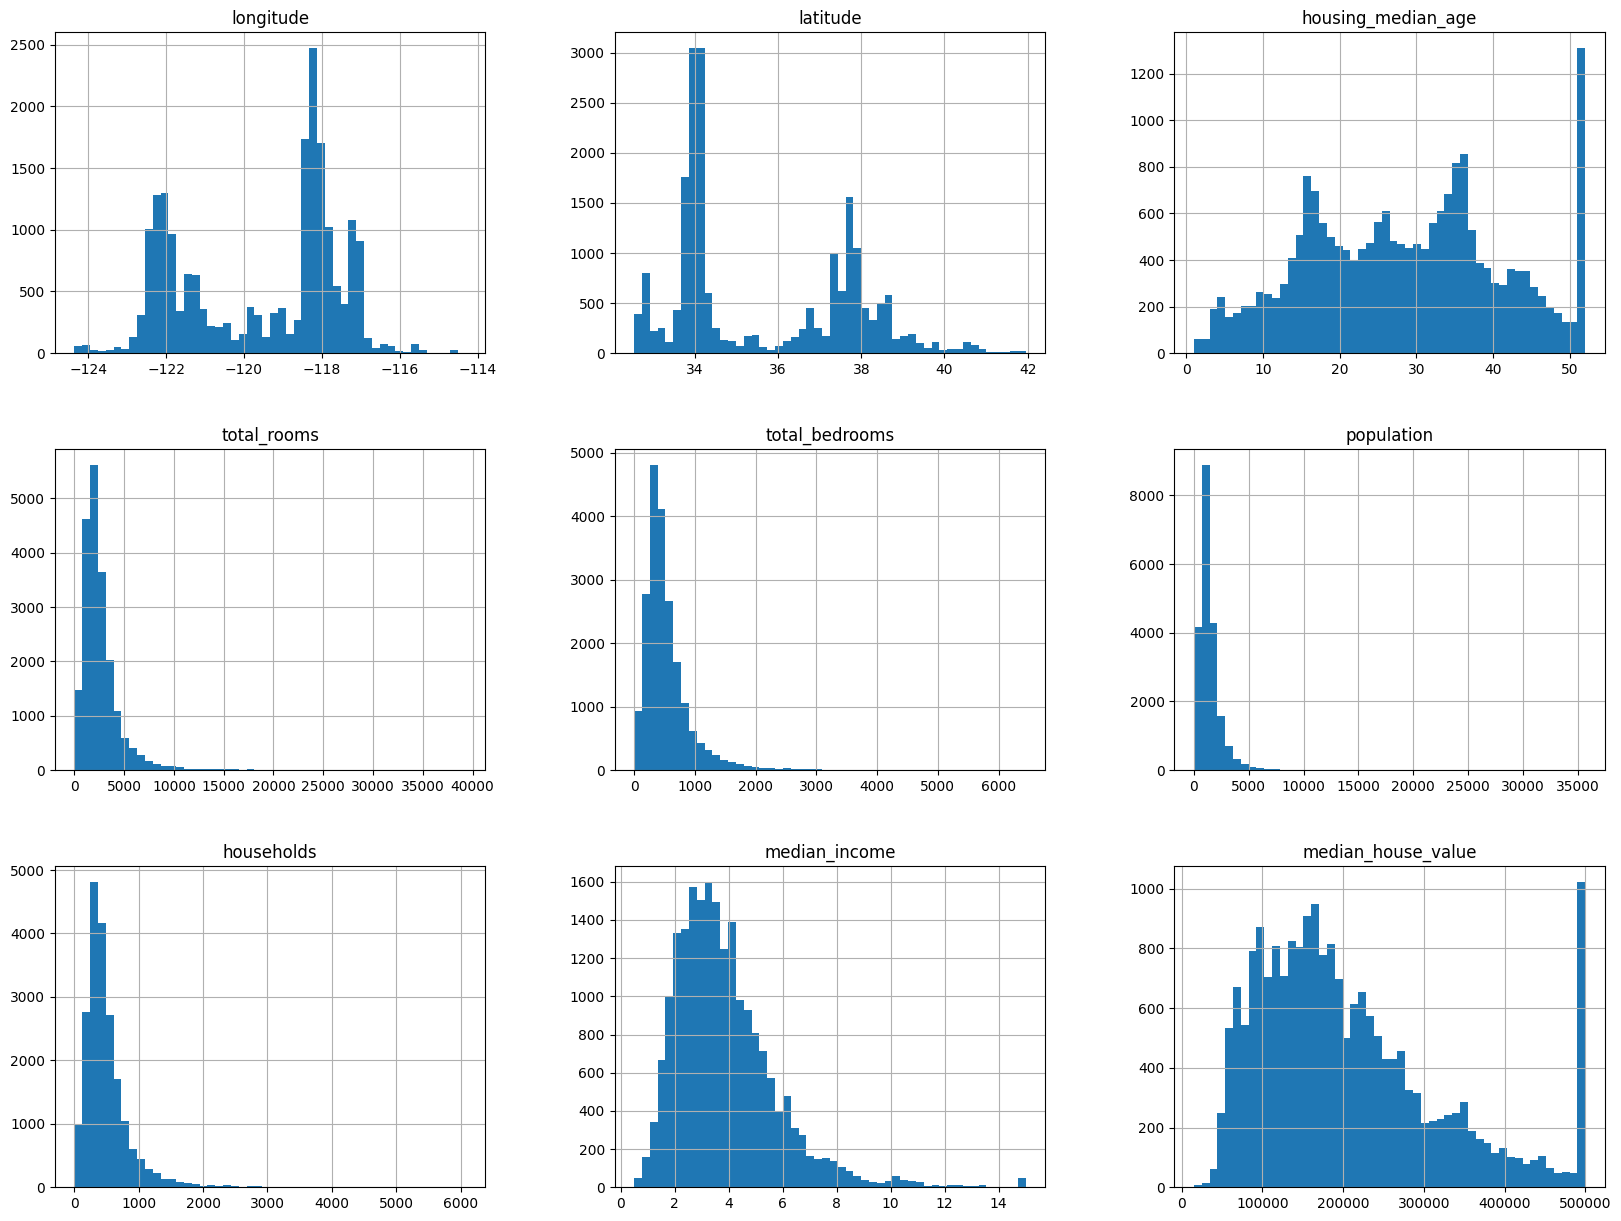

In [16]:
df.hist(bins=50,figsize=(20,15))
plt.show()

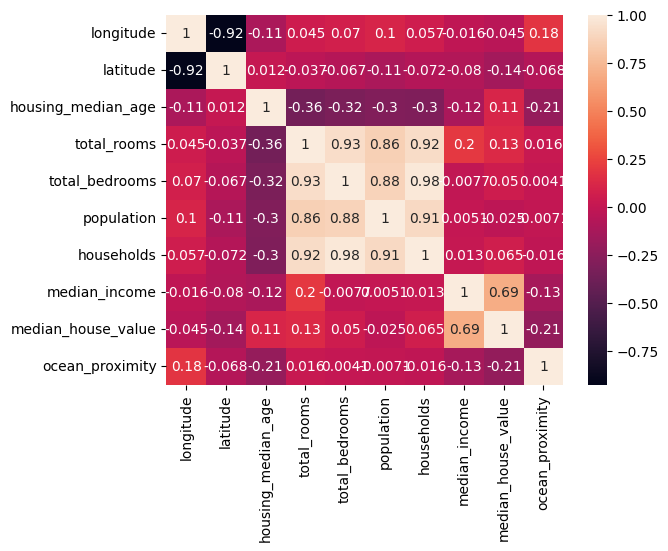

In [17]:

x = sns.heatmap(df.corr(),annot=True)

In [1]:
from sklearn.model_selection import train_test_split

In [18]:
x = df.drop(columns = 'median_house_value')
y = df['median_house_value']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [22]:
x_train

array([[ 0.77267236, -0.90355098, -0.44265332, ...,  0.69385126,
         1.28271372, -0.54544623],
       [ 1.02764385, -0.77692427,  0.51113684, ..., -1.14831336,
        -0.10886005,  0.62985882],
       [ 1.1076349 , -0.55649999, -1.5554085 , ...,  4.0884018 ,
        -0.3659918 ,  0.62985882],
       ...,
       [-1.4620777 ,  0.99115984,  1.22647946, ..., -0.49372397,
         0.95425036,  1.80516387],
       [-0.03223762, -0.55649999,  0.67010187, ..., -0.32296152,
         2.94456623, -0.54544623],
       [-1.4370805 ,  0.99584971, -0.04524075, ...,  2.12204631,
         0.23649903, -1.72075128]])

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [25]:
y_pred = reg.predict(x_test)
y_pred

array([209525.60944784, 186269.43581997, 313222.45196787, ...,
       200537.60490677, 275099.43078761, 284838.99242207])

In [26]:
from sklearn.metrics import accuracy_score
train_score = reg.score(x_test,y_test)

In [27]:
train_score

0.657155151452139

In [29]:
test_score = reg.score(x_train,y_train)
test_score*100

63.23806490128692

In [32]:
y_pred = reg.predict(-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,1)
y_pred

TypeError: LinearModel.predict() takes 2 positional arguments but 10 were given